# Capstone 3 - Step 2: Data Wrangling

The Data Science Method


    1. Problem Identification

    

# Data Wrangling 



   - Data Collection

        - Locating the data

        - Data loading

        - Data joining

   - Data Organization

        - File structure

        - Git & Github

   - Data Definition

        - Column names

        - Data types (numeric, categorical, timestamp, etc.)

        - Description of the columns

        - Count or percent per unique values or codes (including NA)

        - The range of values or codes

   - Data Cleaning

       - NA or missing data

       - Duplicates


2. Exploratory Data Analysis

 - Build data profile tables and plots

   - Outliers & Anomalies
- Explore data relationships
- Identification and creation of features

3. Pre-processing and Training Data Development 


   - Create dummy or indicator features for categorical variables
   - Standardize the magnitude of numeric features
   - Split into testing and training datasets
   - Apply scaler to the testing set


4. Modeling


   - Fit Models with Training Data Set
   - Review Model Outcomes — Iterate over additional models as needed.
   - Identify the Final Model


5. Documentation


   - Review the Results
   - Present and share your findings - storytelling
   - Finalize Code
   - Finalize Documentation


# Data Collection

In [70]:
import pandas as pd

In [71]:
#Loading the datasets

true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [72]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [73]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [156]:
#Creating 'check' on both dfs that will be the target feature.

true_df['check'] = 'TRUE'
fake_df['check'] = 'FAKE'

In [157]:
true_df.head()

,title,text,subject,date,check
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [158]:
fake_df.head()

,title,text,subject,date,check
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [159]:
true_df.describe().T

,count,unique,top,freq
title,21417,20826,Factbox: Trump fills top jobs for his administ...,14
text,21417,21192,(Reuters) - Highlights for U.S. President Dona...,8
subject,21417,2,politicsNews,11272
date,21417,716,"December 20, 2017",182
check,21417,1,TRUE,21417


In [78]:
fake_df.describe().T

,count,unique,top,freq
title,23481,17903,MEDIA IGNORES Time That Bill Clinton FIRED His...,6
text,23481,17455,,626
subject,23481,6,News,9050
date,23481,1681,"May 10, 2017",46
check,23481,1,FAKE,23481


In [160]:
#We will combine both dfs.

df_news = pd.concat([true_df, fake_df])

In [161]:
df_news.head(40)

,title,text,subject,date,check
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",TRUE
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",TRUE
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",TRUE


In [81]:
df_news.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   check    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [162]:
#Shuffling to see some Fakes

df_news.sample(frac = 1)

,title,text,subject,date,check
19872,Iraqi PM says Kurds 'playing with fire' with i...,BAGHDAD (Reuters) - Iraqi Prime Minister Haide...,worldnews,"September 16, 2017",TRUE
7708,Yahoo scanning order unlikely to be made publi...,WASHINGTON (Reuters) - Obama administration of...,politicsNews,"October 25, 2016",TRUE
13461,OBAMA HOSTS MUSLIM EID CELEBRATION…Jabs Trump ...,OBAMA LIES AND SPINS HIS WAY THROUGH A BS SPEE...,politics,"Jul 22, 2016",FAKE
19542,Spain's Rajoy calls on Catalonia leaders to ca...,MADRID (Reuters) - Spanish Prime Minister Mari...,worldnews,"September 20, 2017",TRUE
16261,BREAKING: PRESIDENT TRUMP Signs Most Important...,Via: NPR,Government News,"Jan 20, 2017",FAKE
...,...,...,...,...,...
5704,Huckabee FURIOUS After He’s Forced To Pay $25...,When Kim Davis made her way back on the stree...,News,"June 27, 2016",FAKE
22092,SYRIA: British and American Presence Directly ...,US paratrooper on security duty during a miss...,US_News,"June 16, 2017",FAKE
2823,Trump Seriously Just Said Waterboarding Is Ok...,"On the campaign trail, Donald Trump said he wa...",News,"January 27, 2017",FAKE
12938,LOL! Charlotte #BlackLivesMatter Rioters Post ...,I wish this was a joke!#BlackLivesMatter prote...,politics,"Sep 22, 2016",FAKE


In [163]:
#Searching for null values.

df_news.isna().sum()

title      0
text       0
subject    0
date       0
check      0
dtype: int64

In [164]:
df_news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

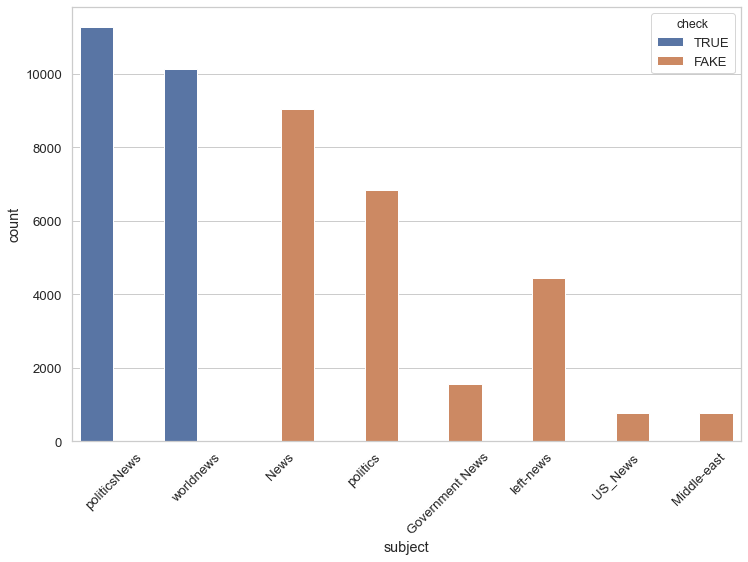

In [119]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "check" , data = df_news)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

In [197]:

df_news = pd.concat([true_df, fake_df])
df_news['text'] = df_news['text'] + " " + df_news['title'] 
del df_news['title']
del df_news['subject']
del df_news['date']

In [198]:
df_news.head()

,text,check
0,WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [199]:
#Removing punctuation

import string

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [203]:
df_news['text'] = df_news['text'].apply(lambda x: x.lower())
df_news['text'] = df_news['text'].apply(punctuation_removal)
df_news['text'].head()

0    washington reuters  the head of a conservative...
1    washington reuters  transgender people will be...
2    washington reuters  the special counsel invest...
3    washington reuters  trump campaign adviser geo...
4    seattlewashington reuters  president donald tr...
Name: text, dtype: object

In [204]:
#Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df_news['text'].apply(lambda x: [item for item in x if item not in stop])

0        [w, h, n, g, n,  , r, e, u, e, r,  ,  , h, e, ...
1        [w, h, n, g, n,  , r, e, u, e, r,  ,  , r, n, ...
2        [w, h, n, g, n,  , r, e, u, e, r,  ,  , h, e, ...
3        [w, h, n, g, n,  , r, e, u, e, r,  ,  , r, u, ...
4        [e, l, e, w, h, n, g, n,  , r, e, u, e, r,  , ...
                               ...                        
23476    [2, 1,  , c, e, n, u, r,  , w, r, e,  ,  ,  , ...
23477    [2, 1,  , c, e, n, u, r,  , w, r, e,  ,  ,  , ...
23478    [p, r, c, k,  , h, e, n, n, n, g, e, n,  ,  , ...
23479    [2, 1,  , c, e, n, u, r,  , w, r, e,  ,  , l, ...
23480    [2, 1,  , c, e, n, u, r,  , w, r, e,  ,  ,  , ...
Name: text, Length: 44898, dtype: object

In [206]:
df_news['text']

0        washington reuters  the head of a conservative...
1        washington reuters  transgender people will be...
2        washington reuters  the special counsel invest...
3        washington reuters  trump campaign adviser geo...
4        seattlewashington reuters  president donald tr...
                               ...                        
23476    21st century wire says as 21wire reported earl...
23477    21st century wire says it s a familiar theme w...
23478    patrick henningsen  21st century wireremember ...
23479    21st century wire says al jazeera america will...
23480    21st century wire says as 21wire predicted in ...
Name: text, Length: 44898, dtype: object

# Data Exploration

check
FAKE    23481
TRUE    21417
Name: text, dtype: int64


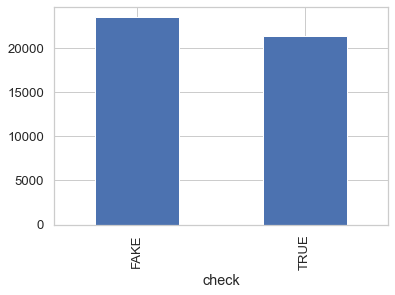

In [209]:
import matplotlib.pyplot as plt
df_news = pd.concat([true_df, fake_df])
print(df_news.groupby(['check'])['text'].count())
df_news.groupby(['check'])['text'].count().plot(kind="bar")
plt.show()


# Visualizing the data with Wordcloud 

In [37]:
!pip install wordcloud

You should consider upgrading via the 'C:\Users\arna_mora\anaconda3\python.exe -m pip install --upgrade pip' command.


In [210]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in df_news.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

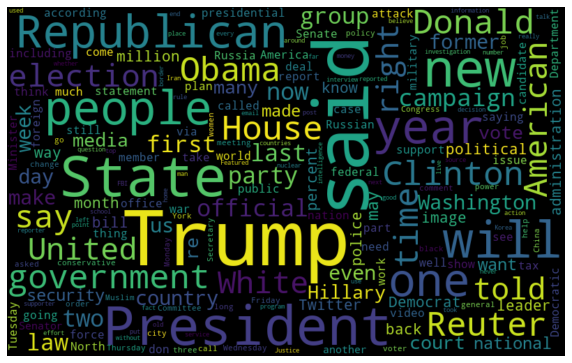

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We will divide the data in to fake and true

In [212]:
#Function to generate wordcloud to True news.

def wordcloud_true(text, column_text):
    true_text = text.query("check == 'TRUE'")
    all_words = ' '.join([text for text in true_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [213]:
#Function to generate wordcloud to Fake news.

def wordcloud_fake(text, column_text):
    fake_text = text.query("check == 'FAKE'")
    all_words = ' '.join([text for text in fake_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

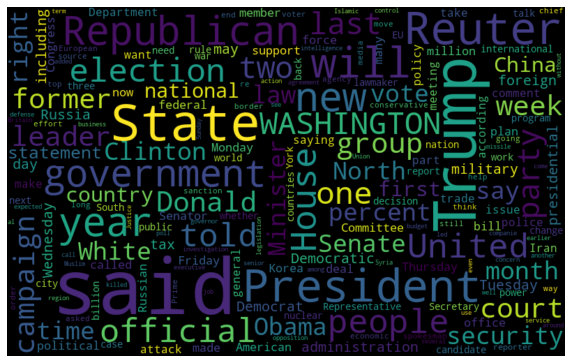

In [214]:
#Wordcloud of the true news.

wordcloud_true(df_news, "text")

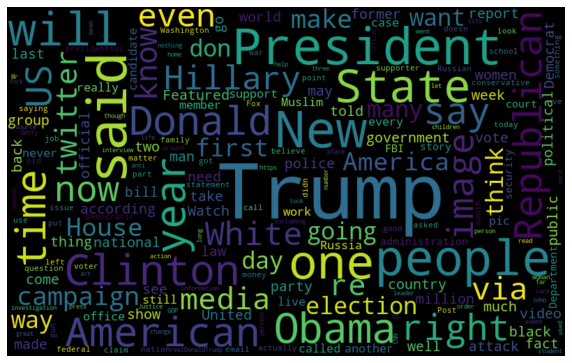

In [215]:
#Wordcloud of the fake news.

wordcloud_fake(df_news, "text")

Most frequent words function:

In [216]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

In [217]:
import seaborn as sns
import nltk
    
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.show()

Most frequent words in fake news:

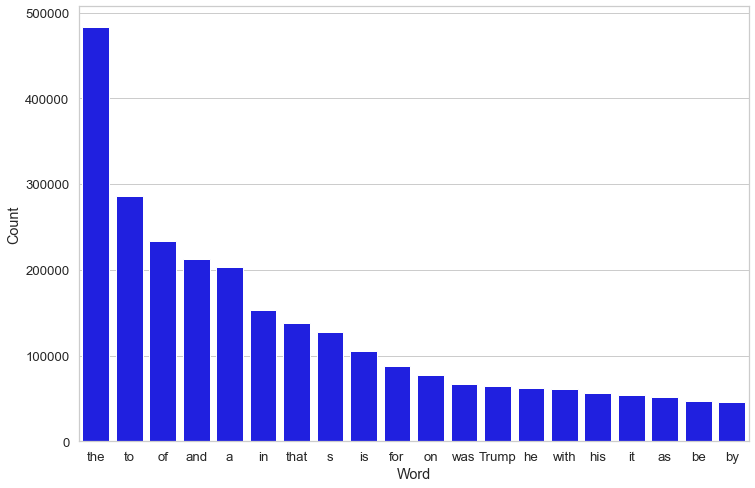

In [219]:
counter(df_news[df_news['check'] == 'FAKE'], 'text', 20)

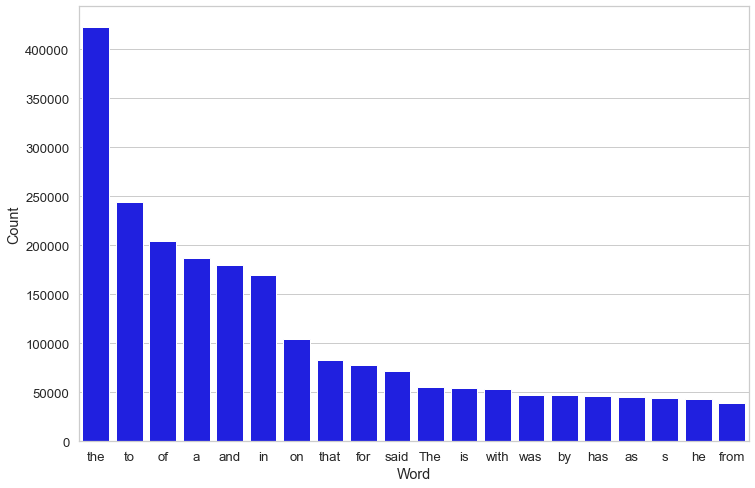

In [220]:
counter(df_news[df_news['check'] == 'TRUE'], 'text', 20)

# Number of characters in news

In [222]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [224]:
df_news['length'] = df_news['text'].apply(length)

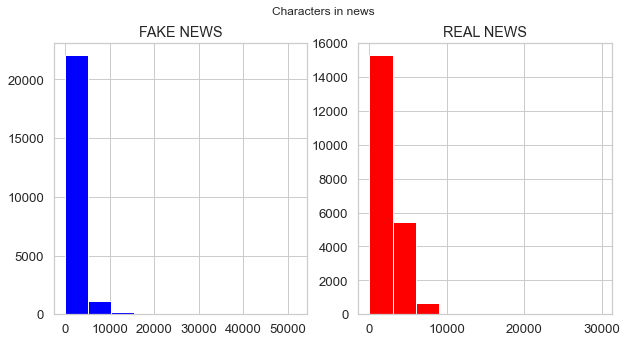

In [225]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df_len=df_news[df_news['check']== 'FAKE']['text'].str.len()
ax1.hist(df_len,color='blue')
ax1.set_title('FAKE NEWS')
df_len=df_news[df_news['check']== 'TRUE']['text'].str.len()
ax2.hist(df_len,color='red')
ax2.set_title('REAL NEWS')
fig.suptitle('Characters in news')
plt.show()

# Number of words in news

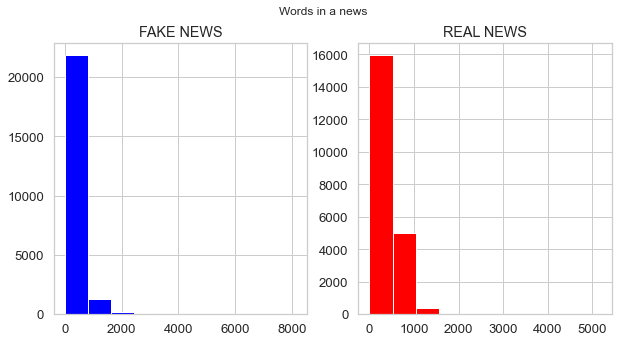

In [226]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df_len=df_news[df_news['check']== 'FAKE']['text'].str.split().map(lambda x: len(x))
ax1.hist(df_len,color='blue')
ax1.set_title('FAKE NEWS')
df_len=df_news[df_news['check']== "TRUE"]['text'].str.split().map(lambda x: len(x))
ax2.hist(df_len,color='red')
ax2.set_title('REAL NEWS')
fig.suptitle('Words in a news')
plt.show()

C:\Users\arna_mora\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\arna_mora\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\arna_mora\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\arna_mora\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'Average word length in each news')

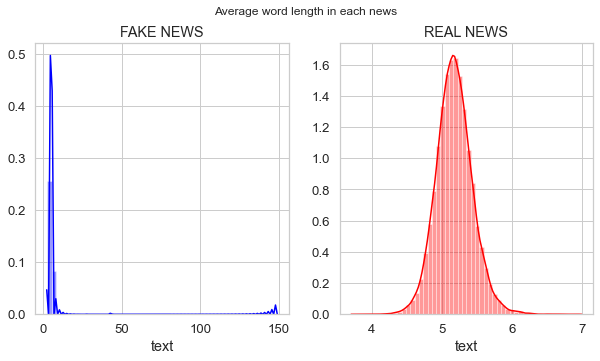

In [227]:
import numpy as np
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_news[df_news['check']== 'FAKE']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('FAKE NEWS')
word=df_news[df_news['check']== 'TRUE']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('REAL NEWS')
fig.suptitle('Average word length in each news')

In [228]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df_news.text)
corpus[:5]

['WASHINGTON', '(Reuters)', '-', 'The', 'head']

In [241]:
def create_corpus(check):
    corpus=[]
    
    for x in df_news[df_news['check']== 'check']['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [242]:
def create_corpus_df(df_news, check):
    corpus=[]
    
    for x in df_news[df_news['check']== 'check']['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [243]:
corpus=create_corpus(0)
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

In [244]:
# displaying the stopwords
np.array(stop)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

# Analyzing punctuations